In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important;}</style>"))
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (12,8)  #시각화 figure default 설정
mpl.rcParams['font.family'] = 'NanumGothic' #폰트 디폴트 설정
mpl.rcParams['font.size'] = 10    #폰트 사이즈 디폴트 설정
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [6]:
df = pd.read_csv('/content/최종광진구0502.csv')

In [7]:
df_1 = pd.read_csv('/content/주차장주차가능면수.csv')

In [8]:
df_new = df.join(df_1["주차장주차면수"], on = "fid")

In [9]:
df.shape

(1095, 41)

In [10]:
df_new.shape

(1095, 42)

In [11]:
df_new = df_new[['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수',
       '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수',
       '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수_y', '주차장주차면수', '전기차충전기수',
       '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무']]

In [12]:
df_new.columns = ['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수',
       '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수',
       '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수', '주차장주차면수', '전기차충전기수',
       '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무']

In [13]:
df_new.shape

(1095, 41)

In [14]:
df_new.columns

Index(['fid', 'id', 'left', 'top', 'right', 'bottom', '관광여가오락수', '교육수', '부동산수',
       '생활서비스수', '소매수', '숙박수', '스포츠수', '음식수', '총건물수', '승차총승객수', '하차총승객수',
       '대지면적', '단독건물수', '건물면적', '공동건축물수', '60대총인구수', '50대총인구수', '40대총인구수',
       '30대총인구수', '20대총인구수', '총인구대비남성비율', '총인구대비여성비율', '생산가능인구남성비율',
       '생산가능인구여성비율', '인구당전기차수', '병원수', '어린이집수', '학교수', '주차장주차면수', '전기차충전기수',
       '급속충전기수', '완속충전기수', '전기차충전기유무', '급속충전기유무', '완속충전기유무'],
      dtype='object')

In [15]:
df_new.to_csv("최종파일0503.csv", index = False)

In [16]:
df_ev = pd.read_csv("/content/한국전력공사_EV시간대별 충전부하_20221231.csv", encoding = "cp949")

In [17]:
df_fast = df_ev.groupby("충전방식").mean().iloc[0,:].reset_index()
df_slow = df_ev.groupby("충전방식").mean().iloc[1,:].reset_index()

In [18]:
df_fast

,index,급속
0,0시,2923.248175
1,1시,2240.109489
2,2시,1670.182482
3,3시,1393.613139
4,4시,1878.868613
5,5시,2793.759124
6,6시,4888.284672
7,7시,7356.094891
8,8시,10252.080292
9,9시,11866.167883


In [19]:
ev_time = pd.DataFrame(df_ev.mean(axis = 0)).reset_index()

In [20]:
ev_time.columns = ["시간", "부하량"]

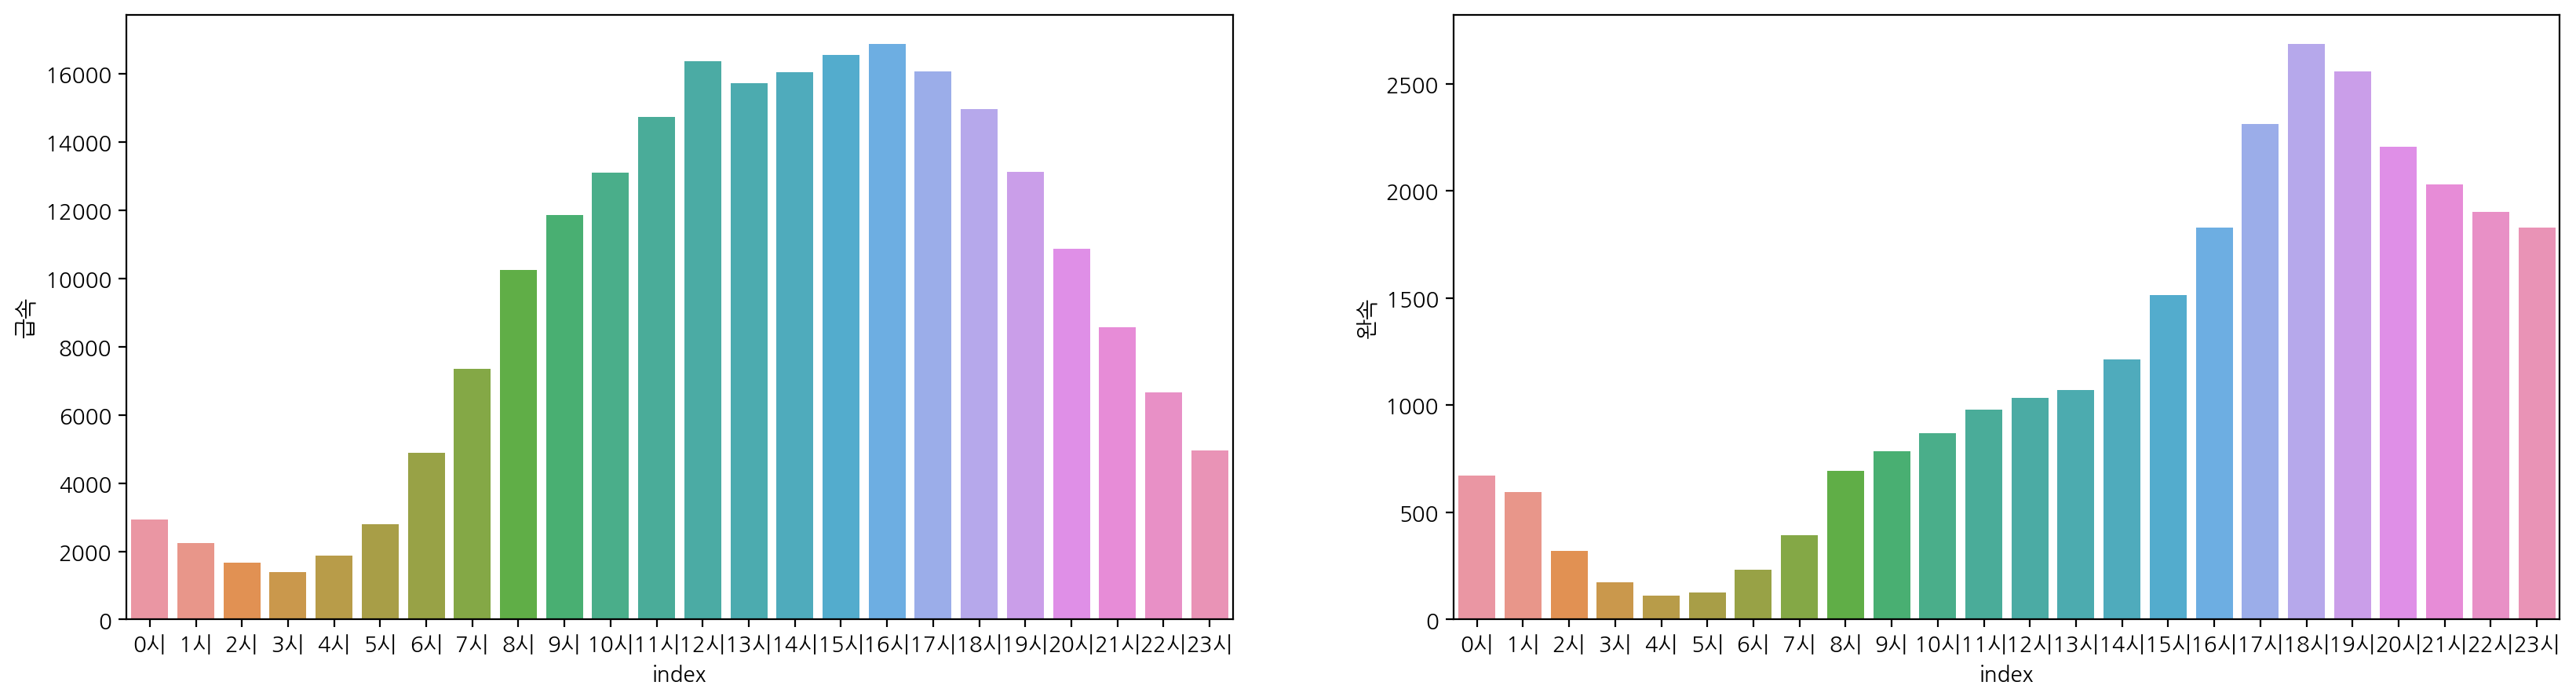

In [21]:
# fig, axs = plt.subplots(figsize = (10, 5))
# sns.barplot(data = df_fast, x= "index", y = "급속", ax = axs[0,0])
# sns.barplot(data = df_slow, x= "index", y = "완속",  ax = axs[0,1])
# plt.show()

fig, axs = plt.subplots(figsize=(20, 5), ncols=2)

sns.barplot(data=df_fast, x="index", y="급속", ax=axs[0])
sns.barplot(data=df_slow, x="index", y="완속", ax=axs[1])

plt.show()

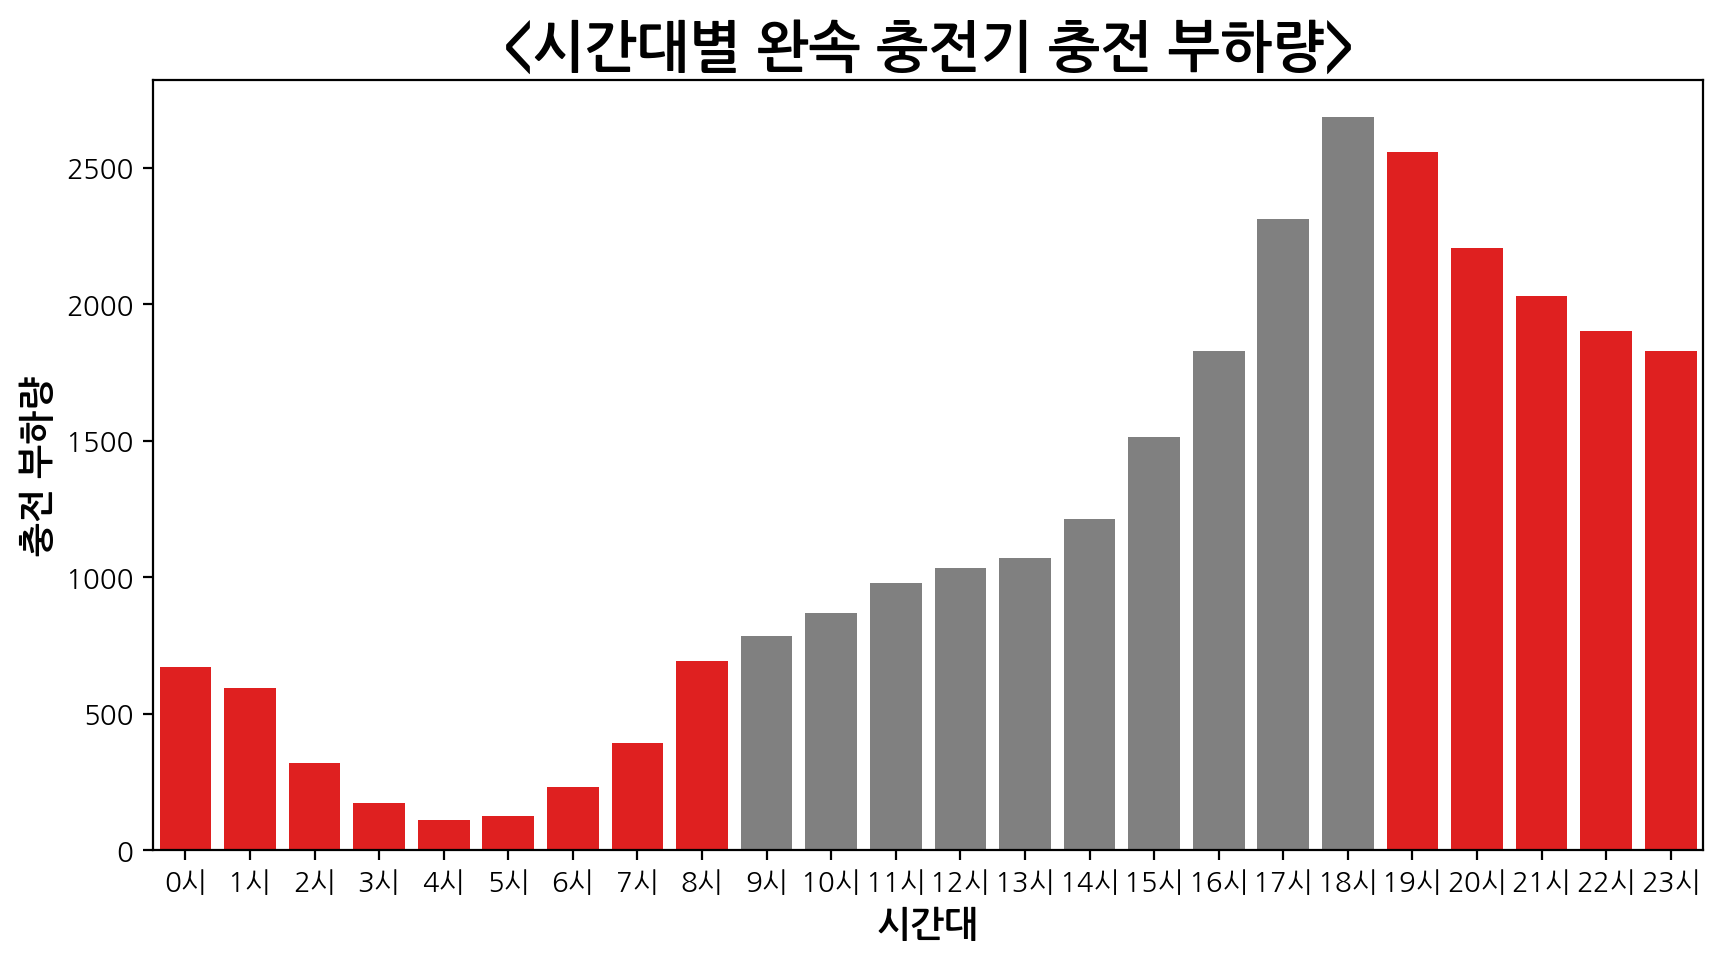

In [87]:
plt.figure(figsize = (10, 5))

cols = ['grey' if (9 <= int(x[:-1])) & (18 >= int(x[:-1])) else 'red' for x in df_slow["index"]]

sns.barplot(data = df_slow, x = "index", y = "완속", palette = cols)

plt.title("<시간대별 완속 충전기 충전 부하량>", fontsize = 20, fontweight = "bold")

plt.xlabel("시간대", fontsize = 13, fontweight = "semibold")
plt.ylabel("충전 부하량", fontsize = 13, fontweight = "semibold")
plt.savefig('slow.png')
plt.show()

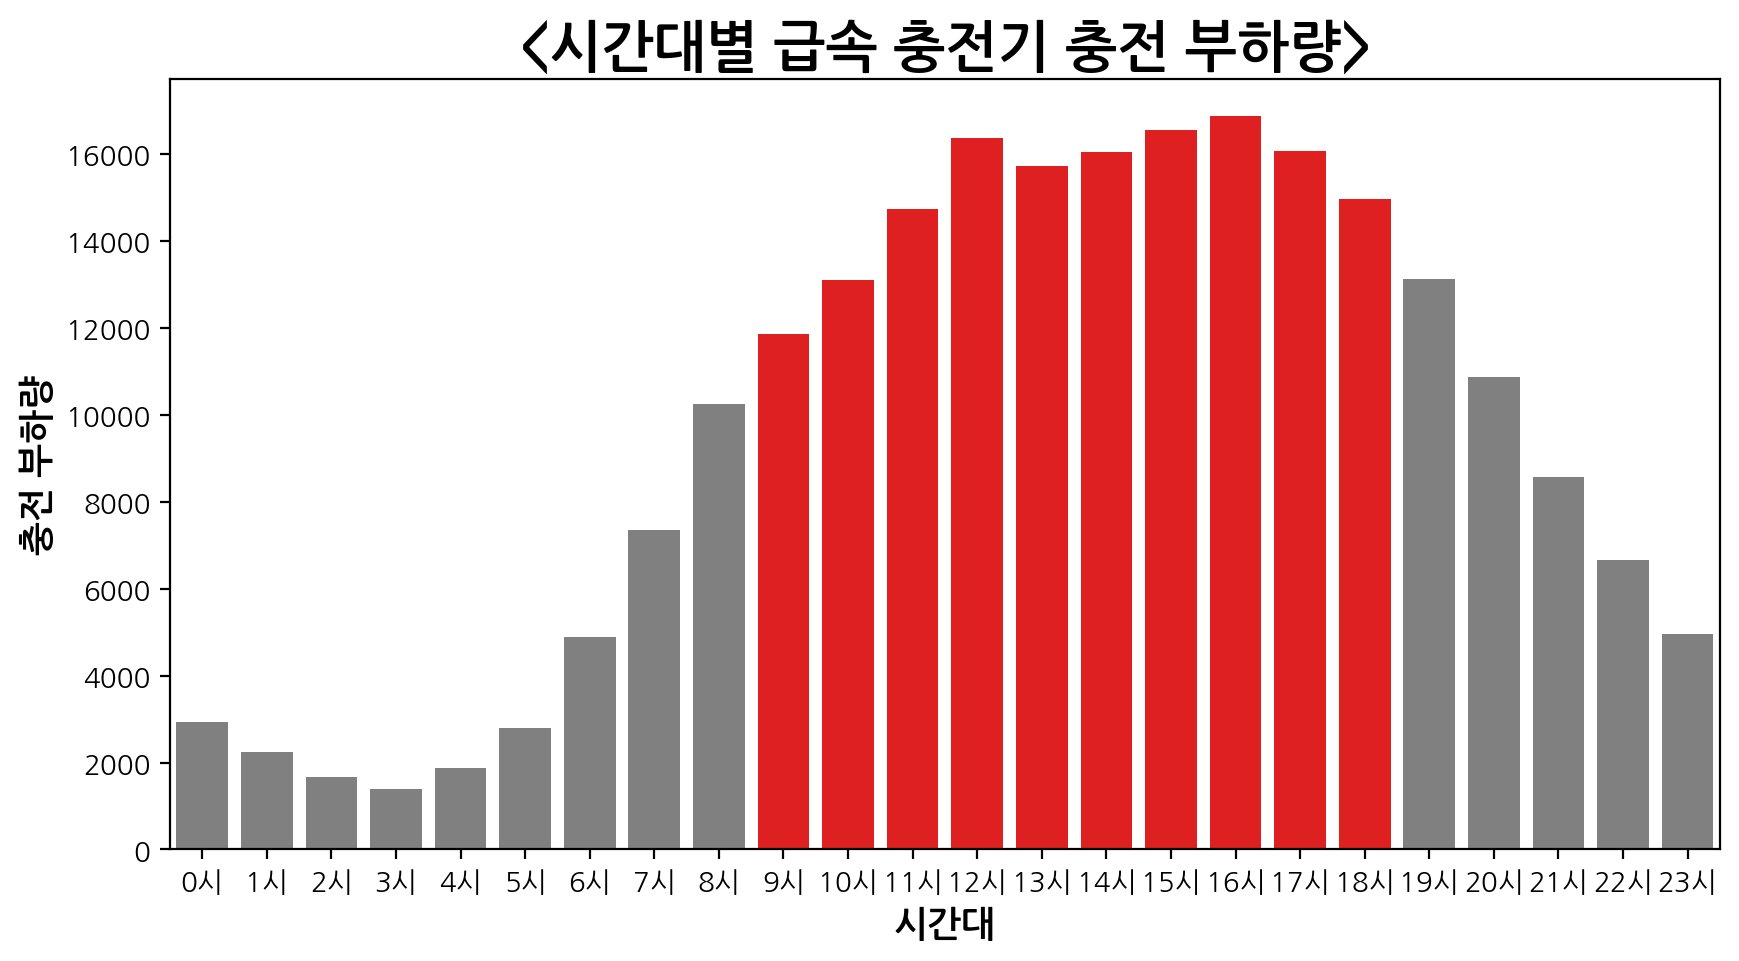

In [88]:
plt.figure(figsize = (10, 5))

cols = ['grey' if (9 > int(x[:-1])) | (18 < int(x[:-1])) else 'red' for x in df_slow["index"]]

sns.barplot(data = df_fast, x = "index", y = "급속", palette = cols)

plt.title("<시간대별 급속 충전기 충전 부하량>", fontsize = 20, fontweight = "bold")

plt.xlabel("시간대", fontsize = 13, fontweight = "semibold")
plt.ylabel("충전 부하량", fontsize = 13, fontweight = "semibold")
plt.savefig('fast.png')
plt.show()

In [89]:
df_cp = pd.read_excel("/content/회사.xlsx")

In [96]:
df_cp["우편번호"].value_counts

<bound method IndexOpsMixin.value_counts of 0       4991
1       5035
2       5034
3       4916
4       5066
        ... 
2464    4919
2465    5105
2466    5064
2467    5116
2468    5017
Name: 우편번호, Length: 2469, dtype: int64>

In [94]:
df_cp

,Unnamed: 0,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,39,육영재단(재),207820,1,4991,서울특별시 광진구 능동,서울특별시 광진구 광나루로,1121510200,1121578000,11,...,1,701201.0,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,10,2526180,0,0
1,96,칠성실업(주),218811,1,5035,서울특별시 광진구 구의동,서울특별시 광진구 아차산로,1121510300,1121587000,11,...,1,701201.0,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,6,1557700,0,0
2,99,우성식품(주),207810,1,5034,서울특별시 광진구 구의동,서울특별시 광진구 광나루로,1121510300,1121587000,11,...,1,512252.0,주류 도매업,1988-01-01,NaN,NaN,14,3487720,0,1
3,108,주식회사 우인웨이브,207812,1,4916,서울특별시 광진구 중곡동,서울특별시 광진구 동일로,1121510100,1121574000,11,...,1,193001.0,연사 및 가공사 제조업 / 특수직물 및 기타 직물 직조,1988-01-01,NaN,NaN,60,17146920,0,1
4,174,대한상운(주),207814,1,5066,서울특별시 광진구 자양동,서울특별시 광진구 아차산로,1121510500,1121584000,11,...,1,602201.0,택시 운송업,1988-01-01,NaN,NaN,5,1364480,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,534519,주식회사알에스코리아,280810,1,4919,서울특별시 광진구 중곡동,서울특별시 광진구 능동로37길,1121510100,1121573000,11,...,1,513313.0,의료용품 도매업,2023-03-01,NaN,NaN,29,8498280,29,0
2465,534533,(주)히히컴퍼니,764880,1,5105,서울특별시 광진구 자양동,서울특별시 광진구 자양로3길,1121510500,1121571000,11,...,1,525101.0,전자상거래 소매업,2023-02-01,NaN,NaN,3,540000,3,0
2466,534674,주식회사미도디자인,673860,1,5064,서울특별시 광진구 자양동,서울특별시 광진구 아차산로40길,1121510500,1121571000,11,...,1,222105.0,기타 인쇄업,2023-02-16,NaN,NaN,4,1229400,4,0
2467,534719,주식회사더휴베이스,504870,1,5116,서울특별시 광진구 구의동,서울특별시 광진구 광나루로56길,1121510300,1121571000,11,...,1,523332.0,주방용품 및 가정용 유리 요업제품 소매업,2023-02-27,NaN,NaN,3,755900,3,0
